In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline
import operator
from matplotlib import pylab as plt
plt.style.use('ggplot')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/countries.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/sessions.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/sample_submission_NDF.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/test_users.csv.zip


In [2]:
train=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip')
test = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/test_users.csv.zip')
#sessions=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/sessions.csv.zip')
#countries=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/countries.csv.zip')
#age_gender=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv.zip')

In [3]:
Id = 'id' 

mysubmission_ID = test.loc[:,Id]

train.drop(Id, axis=1, inplace=True)
test.drop(Id, axis=1, inplace=True)

# For identification purposes
train.loc[:,'Train'] = 1
test.loc[:,'Train'] = 0

test['country_destination'] = 0

df = pd.concat([train,test], ignore_index=True)

In [4]:
train.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Train
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1


In [5]:
test.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Train,country_destination
0,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,0,0
1,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,0,0
2,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,0,0
3,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,0,0
4,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     275547 non-null  object 
 1   timestamp_first_active   275547 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   275547 non-null  object 
 4   age                      158681 non-null  float64
 5   signup_method            275547 non-null  object 
 6   signup_flow              275547 non-null  int64  
 7   language                 275547 non-null  object 
 8   affiliate_channel        275547 non-null  object 
 9   affiliate_provider       275547 non-null  object 
 10  first_affiliate_tracked  269462 non-null  object 
 11  signup_app               275547 non-null  object 
 12  first_device_type        275547 non-null  object 
 13  first_browser            275547 non-null  object 
 14  coun

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 14  coun

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_account_created     62096 non-null  object 
 1   timestamp_first_active   62096 non-null  int64  
 2   date_first_booking       0 non-null      float64
 3   gender                   62096 non-null  object 
 4   age                      33220 non-null  float64
 5   signup_method            62096 non-null  object 
 6   signup_flow              62096 non-null  int64  
 7   language                 62096 non-null  object 
 8   affiliate_channel        62096 non-null  object 
 9   affiliate_provider       62096 non-null  object 
 10  first_affiliate_tracked  62076 non-null  object 
 11  signup_app               62096 non-null  object 
 12  first_device_type        62096 non-null  object 
 13  first_browser            62096 non-null  object 
 14  Train                 

In [9]:
train.describe()

,timestamp_first_active,age,signup_flow,Train
count,2.134510e+05,125461.000000,213451.000000,213451.0
mean,2.013085e+13,49.668335,3.267387,1.0
std,9.253717e+09,155.666612,7.637707,0.0
min,2.009032e+13,1.000000,0.000000,1.0
25%,2.012123e+13,28.000000,0.000000,1.0
50%,2.013091e+13,34.000000,0.000000,1.0
75%,2.014031e+13,43.000000,0.000000,1.0
max,2.014063e+13,2014.000000,25.000000,1.0


1. It seems age column has some troubles. Max=2014 and min=1.

In [10]:
dat=train[['age','gender', 'country_destination']]

In [11]:
agedf=pd.DataFrame(data=dat)

In [12]:
agedf.isnull().sum()

age                    87990
gender                     0
country_destination        0
dtype: int64

In [13]:
agedf.dropna()

,age,gender,country_destination
1,38.0,MALE,NDF
2,56.0,FEMALE,US
3,42.0,FEMALE,other
4,41.0,-unknown-,US
6,46.0,FEMALE,US
...,...,...,...
213441,34.0,FEMALE,ES
213443,36.0,FEMALE,US
213445,23.0,FEMALE,US
213446,32.0,MALE,NDF


In [14]:
agedf.loc[agedf.age > 90, 'age'] = 90
agedf.loc[agedf.age < 14, 'age'] = 14


In [15]:
df.loc[df.age > 90, 'age'] = 90
df.loc[df.age < 14, 'age'] = 14

In [16]:
agedf.groupby(['gender'])['age'].mean()


gender
-unknown-    39.133112
FEMALE       37.100671
MALE         37.507508
OTHER        37.587719
Name: age, dtype: float64

In [17]:
df.isnull().sum()

date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
Train                           0
dtype: int64

In [18]:
df.describe()

,timestamp_first_active,age,signup_flow,Train
count,2.755470e+05,158681.000000,275547.000000,275547.000000
mean,2.013310e+13,36.952786,4.291965,0.774645
std,9.146438e+09,13.468862,8.794313,0.417817
min,2.009032e+13,14.000000,0.000000,0.000000
25%,2.013040e+13,28.000000,0.000000,1.000000
50%,2.014010e+13,33.000000,0.000000,1.000000
75%,2.014062e+13,42.000000,1.000000,1.000000
max,2.014093e+13,90.000000,25.000000,1.000000


In [19]:
df[df['age']<=2000].sort_values(by=['age'], ascending = False)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Train
138316,2014-01-05,20140105181111,NaN,MALE,90.0,basic,0,en,direct,direct,untracked,Web,iPad,Mobile Safari,NDF,1
125723,2013-11-19,20131119011403,NaN,FEMALE,90.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1
246453,2014-08-17,20140817001454,NaN,FEMALE,90.0,facebook,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,0,0
63104,2013-03-02,20130302142616,2014-02-19,-unknown-,90.0,basic,24,en,direct,direct,untracked,Moweb,Mac Desktop,Safari,US,1
45353,2012-10-18,20121018210222,2012-10-20,MALE,90.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Firefox,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2010-08-19,20100819224047,NaN,MALE,14.0,facebook,2,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,1
1488,2010-08-23,20100823175902,NaN,MALE,14.0,facebook,3,en,seo,google,NaN,Web,Other/Unknown,-unknown-,NDF,1
1296,2010-08-05,20100805050642,NaN,-unknown-,14.0,basic,3,en,seo,google,untracked,Web,Mac Desktop,Safari,NDF,1
983,2010-07-06,20100706163955,NaN,FEMALE,14.0,facebook,3,en,sem-non-brand,vast,linked,Web,iPhone,Mobile Safari,NDF,1


Assumption = Bu kişilerin yaşları yerine doğum tarihlerini girdiklerini düşündüm.

In [20]:
def ageconverter(age):
    if (age<2000) & (age>1000):
        return (2014-age)
    else:
        return age

In [21]:
df['aged'] =df['age'].apply(ageconverter)

In [22]:
df['aged'].describe()

count    158681.000000
mean         36.952786
std          13.468862
min          14.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          90.000000
Name: aged, dtype: float64

In [23]:
df =df.drop(df[df['aged'] >= 90].index)

In [24]:
dft=df[df['Train']==1]

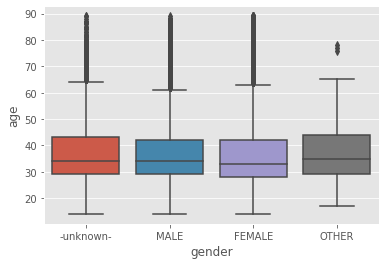

In [25]:
sns.boxplot(x='gender', y='age', data =df[df['Train']==1])

In [26]:
dft['aged'].mean()


36.445549227013835

In [27]:
dft.groupby('gender')['age'].mean()

gender
-unknown-    36.861564
FEMALE       36.117561
MALE         36.681592
OTHER        36.888889
Name: age, dtype: float64

In [28]:
df['aged'].fillna(dft['aged'].mean(), inplace =True)

In [29]:
df['aged']=df['aged'].astype(int)

In [30]:
df.isnull().sum()

date_account_created            0
timestamp_first_active          0
date_first_booking         185066
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6033
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
Train                           0
aged                            0
dtype: int64

Yaş için imputation OK, diğer featurelara bakıyorum

In [31]:
from datetime import datetime

In [32]:
first_active_date =[]
for i in df['timestamp_first_active']:
    d = datetime.strptime(str(i),'%Y%m%d%H%M%S')
    day_string = d.strftime('%Y-%m-%d')
    first_active_date.append(day_string)

In [33]:
first_active_time =[]
for i in df['timestamp_first_active']:
    d = datetime.strptime(str(i),'%Y%m%d%H%M%S')
    time_string = d.strftime('%H:%M:%S')
    first_active_time.append(time_string)
    

In [34]:
df['first_active_date']=first_active_date

In [35]:
df['first_active_time']=first_active_time

In [36]:
df.tail()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Train,aged,first_active_date,first_active_time
275542,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,0,0,31,2014-09-30,23:52:32
275543,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,0,0,36,2014-09-30,23:53:06
275544,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,0,0,36,2014-09-30,23:54:08
275545,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,0,0,36,2014-09-30,23:54:30
275546,2014-09-30,20140930235901,NaN,FEMALE,49.0,basic,0,en,other,other,tracked-other,Web,Windows Desktop,Chrome,0,0,49,2014-09-30,23:59:01


In [37]:
fad = np.vstack(df['first_active_date'].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['fad_year'] = fad[:, 0]
df['fad_month'] = fad[:, 1]
df['fad_day'] = fad[:, 2]
df = df.drop(['first_active_date'], axis=1)

In [38]:
fad = np.vstack(df['first_active_time'].astype(str).apply(lambda x: list(map(int, x.split(':')))).values)
df['fad_hour'] = fad[:, 0]
df = df.drop(['first_active_time'], axis=1)

In [39]:
df.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,country_destination,Train,aged,fad_year,fad_month,fad_day,fad_hour
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,...,Web,Mac Desktop,Chrome,NDF,1,36,2009,3,19,4
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,...,Web,Mac Desktop,Chrome,NDF,1,38,2009,5,23,17
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Web,Windows Desktop,IE,US,1,56,2009,6,9,23
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Firefox,other,1,42,2009,10,31,6
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Web,Mac Desktop,Chrome,US,1,41,2009,12,8,6


In [40]:
dft=df[df['Train']==1]

In [41]:
dft.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,country_destination,Train,aged,fad_year,fad_month,fad_day,fad_hour
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,...,Web,Mac Desktop,Chrome,NDF,1,36,2009,3,19,4
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,...,Web,Mac Desktop,Chrome,NDF,1,38,2009,5,23,17
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Web,Windows Desktop,IE,US,1,56,2009,6,9,23
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Web,Mac Desktop,Firefox,other,1,42,2009,10,31,6
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Web,Mac Desktop,Chrome,US,1,41,2009,12,8,6


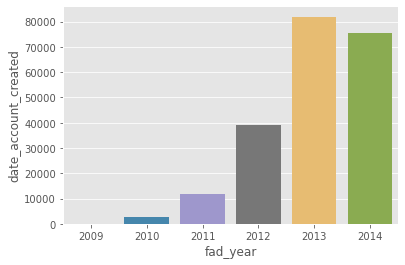

In [42]:
year_counts = dft.groupby('fad_year').count()['date_account_created'].to_frame().reset_index()
ax = sns.barplot(x = 'fad_year' , y='date_account_created', data = year_counts)

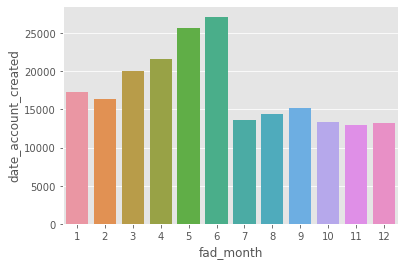

In [43]:
month_counts = dft.groupby('fad_month').count()['date_account_created'].to_frame().reset_index()
bx = sns.barplot(x = 'fad_month' , y='date_account_created', data = month_counts)

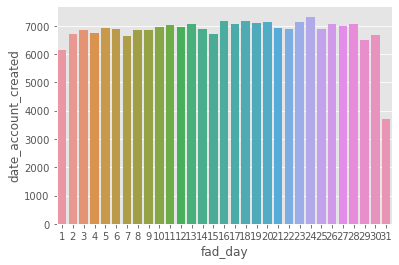

In [44]:
day_counts = dft.groupby('fad_day').count()['date_account_created'].to_frame().reset_index()
cx = sns.barplot(x = 'fad_day' , y='date_account_created', data = day_counts)

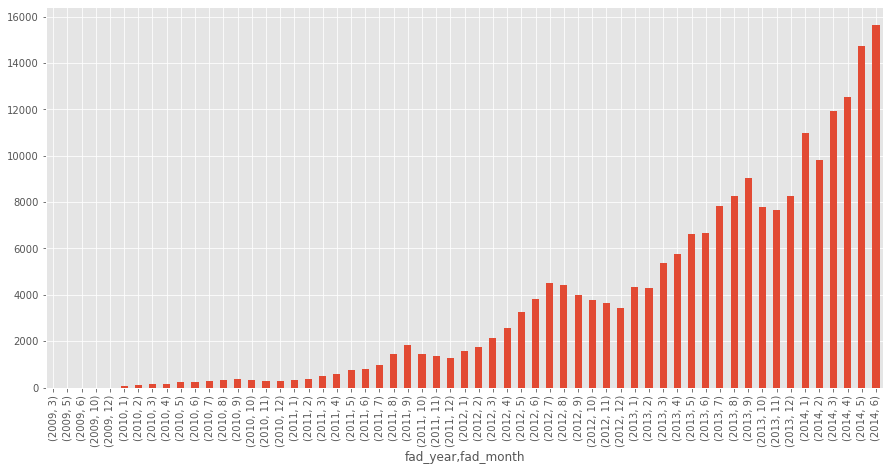

In [45]:
plt.figure(figsize=(15,7))
dft.groupby(['fad_year','fad_month']).count()['date_account_created'].plot.bar()

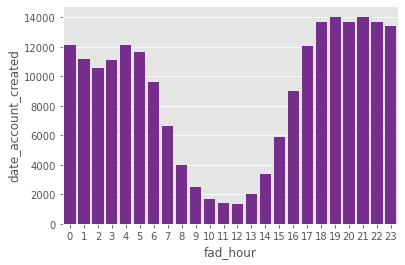

In [46]:
hour_nums = dft.groupby(['fad_hour']).count()['date_account_created'].to_frame().reset_index()
dx = sns.barplot(x = 'fad_hour' , y="date_account_created", data = hour_nums, color=sns.xkcd_rgb["purple"])

In [47]:
df['date_first_booking'].isnull().sum()

185066

In [48]:
df.tail()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,signup_app,first_device_type,first_browser,country_destination,Train,aged,fad_year,fad_month,fad_day,fad_hour
275542,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,...,Web,Windows Desktop,IE,0,0,31,2014,9,30,23
275543,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,...,Android,Android Phone,-unknown-,0,0,36,2014,9,30,23
275544,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,...,Web,Windows Desktop,Firefox,0,0,36,2014,9,30,23
275545,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,...,Web,Mac Desktop,Safari,0,0,36,2014,9,30,23
275546,2014-09-30,20140930235901,NaN,FEMALE,49.0,basic,0,en,other,other,...,Web,Windows Desktop,Chrome,0,0,49,2014,9,30,23


In [49]:
df['booking']=0

In [50]:
df['booking'].loc[df['date_first_booking'].isnull()==False]=1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [51]:
df['booking']

0         0
1         0
2         1
3         1
4         1
         ..
275542    0
275543    0
275544    0
275545    0
275546    0
Name: booking, Length: 272598, dtype: int64

In [52]:
df['date_first_booking'].fillna(0, inplace =True)

In [53]:
df['booking'].loc[df['date_first_booking'].isnull()==False]=1

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [54]:
"""
dfb = np.vstack(df[df['date_first_booking']!=0].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['dfb_year'] = dfb[:, 0]
df['dfb_month'] = dfb[:, 1]
df['dfb_day'] = dfb[:, 2]
df = df.drop(['date_first_booking'], axis=1)

"""

"\ndfb = np.vstack(df[df['date_first_booking']!=0].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)\ndf['dfb_year'] = dfb[:, 0]\ndf['dfb_month'] = dfb[:, 1]\ndf['dfb_day'] = dfb[:, 2]\ndf = df.drop(['date_first_booking'], axis=1)\n\n"

In [55]:
"""
booking_year_counts = df.groupby('dfb_year').count()['date_account_created'].to_frame().reset_index()
ex = sns.barplot(x = 'dfb_year' , y='date_account_created', data = booking_year_counts )
"""

"\nbooking_year_counts = df.groupby('dfb_year').count()['date_account_created'].to_frame().reset_index()\nex = sns.barplot(x = 'dfb_year' , y='date_account_created', data = booking_year_counts )\n"

In [56]:
"""
booking_month_counts = df.groupby('dfb_month').count()['date_account_created'].to_frame().reset_index()
fx = sns.barplot(x = 'dfb_month' , y='date_account_created', data = booking_month_counts)
"""

"\nbooking_month_counts = df.groupby('dfb_month').count()['date_account_created'].to_frame().reset_index()\nfx = sns.barplot(x = 'dfb_month' , y='date_account_created', data = booking_month_counts)\n"

In [57]:
"""
booking_day_counts = df.groupby('dfb_day').count()['date_account_created'].to_frame().reset_index()
gx = sns.barplot(x = 'dfb_day' , y='date_account_created', data = booking_day_counts)
"""

"\nbooking_day_counts = df.groupby('dfb_day').count()['date_account_created'].to_frame().reset_index()\ngx = sns.barplot(x = 'dfb_day' , y='date_account_created', data = booking_day_counts)\n"

In [58]:
"""
df.groupby("dfb_month")["dfb_year"].unique()
""""""

KeyError: 'dfb_month'

In [ ]:
"""
monthdest = df[(df['dfb_month']<7)].copy()
"""

In [ ]:
"""
dfb_month_counts = monthdest.groupby('dfb_year').count()['date_account_created'].to_numpy()
tx = sns.barplot(x = [2010, 2011, 2012, 2013, 2014, 2015] , y=dfb_month_counts)
"""

In [ ]:
"""
dest_nums =  dft.groupby('country_destination').count()['date_account_created'].sort_values(ascending = False).to_frame().reset_index()
hx = sns.barplot(x = 'country_destination' , y="date_account_created", data = dest_nums)
"""

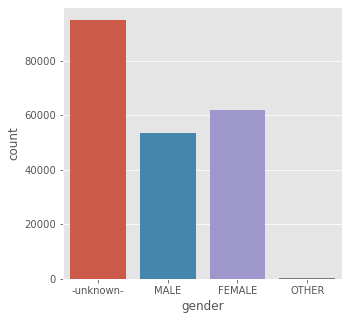

In [59]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=dft)

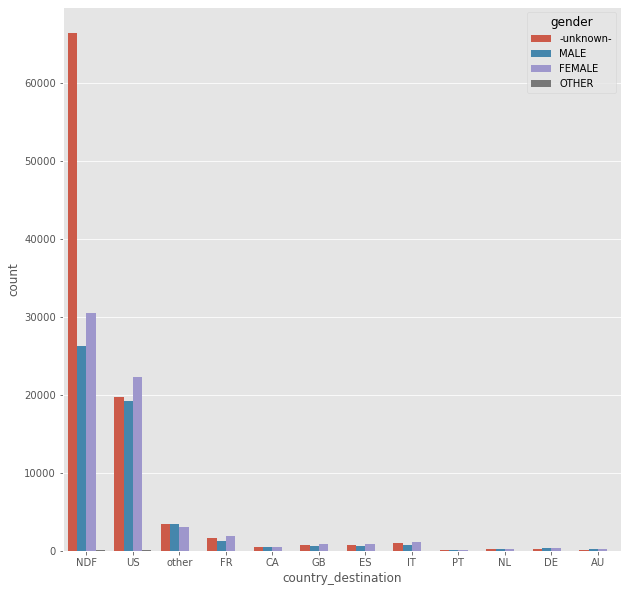

In [60]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='country_destination', data=dft, hue ='gender')

In [61]:
def freq(data, var):
    freq = data[var].value_counts().reset_index()
    freq.columns = [var, 'count']
    freq['percent'] = freq['count'] / freq['count'].sum() * 100
    freq['percent'] = freq['percent'].map('{:,.2f}%'.format)
    return(freq)

In [62]:
dft=df[df['Train']==1]

In [63]:
print(freq(dft, 'gender'))

      gender  count percent
0  -unknown-  94968  45.03%
1     FEMALE  61988  29.39%
2       MALE  53655  25.44%
3      OTHER    279   0.13%


In [64]:
df['gender'].replace('-unknown-',np.nan,inplace=True)

In [65]:
df['gendered']=df['gender']

In [66]:
g=['FEMALE','MALE','OTHER']

In [67]:
f=dft[dft['gender']=='FEMALE']['date_account_created'].count()
m=dft[dft['gender']=='MALE']['date_account_created'].count()
o=dft[dft['gender']=='OTHER']['date_account_created'].count()

In [68]:
f1=f/(f+m+o)
m1=m/(f+m+o)
o1=o/(f+m+o)

In [69]:
p=list([f1,m1,o1])

In [ ]:
p

In [ ]:
df['gender']

In [70]:
df['genderfilled'] = df['gender'].fillna(np.random.choice(g, p=[0.533, 0.464, 0.003]))

In [71]:
df.drop(['gendered'],axis=1,inplace=True)

In [72]:
df.select_dtypes("object").columns

Index(['date_account_created', 'date_first_booking', 'gender', 'signup_method',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'genderfilled'],
      dtype='object')

In [73]:
dac = np.vstack(df['date_account_created'].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['dac_year'] = dac[:, 0]
df['dac_month'] = dac[:, 1]
df['dac_day'] = dac[:, 2]
df = df.drop(['date_account_created'], axis=1)

In [74]:
df = df.drop(['gender'], axis=1)

In [75]:
df = df.drop(['age'], axis=1)

In [76]:
from sklearn.preprocessing import LabelEncoder 


In [77]:
df['first_affiliate_tracked'].unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [78]:
df['first_affiliate_tracked'].isnull().sum()

6033

In [79]:
print(freq(df, 'first_affiliate_tracked'))

  first_affiliate_tracked   count percent
0               untracked  141720  53.17%
1                  linked   61356  23.02%
2                     omg   54277  20.36%
3           tracked-other    6540   2.45%
4                 product    2324   0.87%
5               marketing     280   0.11%
6               local ops      68   0.03%


In [80]:
df['first_affiliate_tracked'].fillna('untracked', inplace=True)

In [81]:
le = LabelEncoder() 
  
df['genderfilled']= le.fit_transform(df['genderfilled'])
df['signup_method']= le.fit_transform(df['signup_method']) 
df['first_affiliate_tracked']= le.fit_transform(df['first_affiliate_tracked']) 
df['signup_method']= le.fit_transform(df['signup_method']) 
df['language']= le.fit_transform(df['language'])
df['affiliate_channel']= le.fit_transform(df['affiliate_channel'])
df['affiliate_provider']= le.fit_transform(df['affiliate_provider'])
df['signup_app']= le.fit_transform(df['signup_app'])
df['first_device_type']= le.fit_transform(df['first_device_type'])
df['first_browser']= le.fit_transform(df['first_browser'])


In [ ]:
labels =df[df['Train']==1]['country_destination'].values

In [82]:
y_train = le.fit_transform(labels)

NameError: name 'labels' is not defined

In [ ]:
df['genderfilled']

In [ ]:
X_train =df[df['Train']==1].drop(['country_destination','date_first_booking'],axis=1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

X_test =df[df['Train']==0].drop(['country_destination','date_first_booking'],axis=1)
y_test =df[df['Train']==0]['country_destination']


In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
""""
import xgboost as xgb
labels = df.drop(['country_destination','date_first_booking'], axis=1)
""""

In [ ]:
""""
n_labels = len(set(labels))
n_train = train.shape[0]
n_test = test.shape[0]
""""

In [ ]:
""""
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'merror',
    'num_class': n_labels,
    'eta': 0.3,
    'max_depth': 6,
    'subsample': 0.5,
    'colsample_bytree': 0.3,
    'silent': 1,
    'seed': 123
}

num_boost_round = 50

dtrain = xgb.DMatrix(X_train, y_train)
res = xgb.cv(params, dtrain, num_boost_round=num_boost_round, nfold=5,
             callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                        xgb.callback.early_stop(1)])
      """"                  

In [ ]:
""""

res = xgb.cv(params, dtrain, num_boost_round=num_boost_round, nfold=5,
             callbacks=[xgb.callback.print_evaluation(show_stdv=True),
                        xgb.callback.early_stop(1)])

num_boost_round = res['test-merror-mean'].idxmin()
clf = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round)

importance = clf.get_fscore()
importance_df = pd.DataFrame(
    sorted(importance.items(), key=operator.itemgetter(1)),
    columns=['feature', 'fscore']
)
importance_df = importance_df.iloc[-20:, :]

plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore',
                   legend=False, figsize=(30, 12))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance.png')
""""

In [ ]:
"""
dtest = xgb.DMatrix(X_test)
y_pred = clf.predict(dtest).reshape(n_test, n_labels)


ids = []
countries = []
for i in range(len(test_id)):
    idx = test_id[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()
"""

In [ ]:
x=

In [ ]:
y

In [ ]:
#fig = plt.figure(figsize = (25,15))
#sns.heatmap(trained.corr(), annot =True, fmt='.1f')

In [ ]:
#country = train.groupby('country_destination')['age'].mean().sort_values(ascending = False)
#country.to_frame().reset_index()

In [ ]:
#sns.countplot(x='country_destination', data=train, hue ='gender')

In [ ]:
#train.groupby('country_destination')['age'].mean()